Centroids:
[[2.2        2.8        1.7       ]
 [8.5        8.16666667 8.        ]]

Labels:
[0 0 0 1 1 1 0 0]


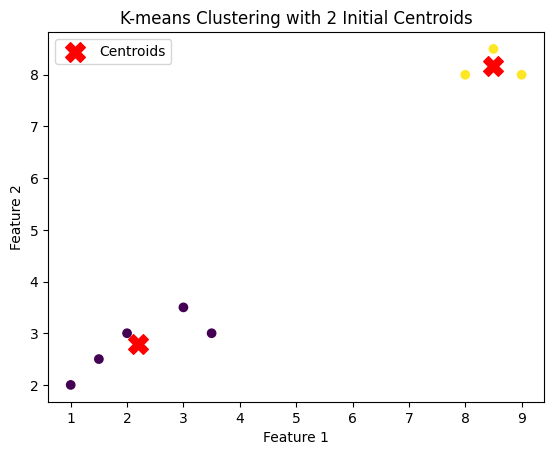

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Dữ liệu
data = {
    'Feature 1': [2.0, 3.0, 3.5, 8.0, 8.5, 9.0, 1.0, 1.5],
    'Feature 2': [3.0, 3.5, 3.0, 8.0, 8.5, 8.0, 2.0, 2.5],
    'Feature 3': [1.5, 2.0, 2.5, 7.5, 8.0, 8.5, 1.0, 1.5]
}

# Chuyển dữ liệu thành DataFrame
df = pd.DataFrame(data)

# Chuyển DataFrame thành numpy array
data_array = df.to_numpy()

# Chọn hai điểm đầu tiên làm centroids ban đầu
initial_centroids = np.array([data_array[0], data_array[1]])

# Khởi tạo KMeans với số cụm là 2 và chỉ định centroids ban đầu
kmeans = KMeans(n_clusters=2, init=initial_centroids, n_init=1)

# Huấn luyện mô hình KMeans
kmeans.fit(data_array)

# Lấy thông tin các centroids và nhãn của mỗi điểm dữ liệu
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# In ra kết quả
print("Centroids:")
print(centroids)
print("\nLabels:")
print(labels)

# Vẽ biểu đồ
plt.scatter(data_array[:, 0], data_array[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering with 2 Initial Centroids')
plt.legend()
plt.show()


In [12]:
point_data = np.array([2.0, 3.0, 1.5])
centroid = np.array([8.0, 8.0, 7.5])

# Tính khoảng cách Euclid
distance = np.linalg.norm(point_data - centroid)
distance

9.848857801796104

In [13]:
import numpy as np
import pandas as pd

# Dữ liệu
data = {
    'Feature 1': [2.0, 3.0, 3.5, 8.0, 8.5, 9.0, 1.0, 1.5],
    'Feature 2': [3.0, 3.5, 3.0, 8.0, 8.5, 8.0, 2.0, 2.5],
    'Feature 3': [1.5, 2.0, 2.5, 7.5, 8.0, 8.5, 1.0, 1.5]
}

# Tạo DataFrame
df = pd.DataFrame(data)

# Tọa độ của các centroid
centroid1 = np.array([2.0, 3.0, 1.5])
centroid2 = np.array([1.0, 2.0, 1.0])

# Tọa độ của điểm dữ liệu cần phân cụm
data_point = np.array([3.0, 3.5, 2.0])

# Tính khoảng cách Euclid từ điểm dữ liệu đến các centroid
distance_to_centroid1 = np.linalg.norm(data_point - centroid1)
distance_to_centroid2 = np.linalg.norm(data_point - centroid2)

# In kết quả
print(f"Khoảng cách Euclid đến centroid 1: {distance_to_centroid1}")
print(f"Khoảng cách Euclid đến centroid 2: {distance_to_centroid2}")

# Xác định cụm
if distance_to_centroid1 < distance_to_centroid2:
    print("Điểm dữ liệu thuộc cụm 1")
else:
    print("Điểm dữ liệu thuộc cụm 2")


Khoảng cách Euclid đến centroid 1: 1.224744871391589
Khoảng cách Euclid đến centroid 2: 2.692582403567252
Điểm dữ liệu thuộc cụm 1


In [28]:
import numpy as np

# Dữ liệu
data = np.array([
    [2.0, 3.0, 1.5],
    [3.0, 3.5, 2.0],
    [3.5, 3.0, 2.5],
    [8.0, 8.0, 7.5],
    [8.5, 8.5, 8.0],
    [9.0, 8.0, 8.5],
    [1.0, 2.0, 1.0],
    [1.5, 2.5, 1.5]
])

# Số cụm
k = 3

centroids = data[np.random.choice(data.shape[0], k, replace=False)]

# Hàm tính khoảng cách Euclid
def calculate_distance(x, centroids):
    return np.linalg.norm(x[:, np.newaxis] - centroids, axis=2)

# Hàm cập nhật các centroid
def update_centroids(data, labels, k):
    return np.array([data[labels == i].mean(axis=0) for i in range(k)])

# Thuật toán K-Means
def k_means(data, k, max_iters=100):
    # Khởi tạo các centroid
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        # Tính khoảng cách từ các điểm đến các centroid
        distances = calculate_distance(data, centroids)
        
        # Gán điểm dữ liệu vào cụm gần nhất
        labels = np.argmin(distances, axis=1)
        
        # Cập nhật các centroid
        new_centroids = update_centroids(data, labels, k)
        
        # Kiểm tra sự thay đổi của các centroid
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids

# Chạy thuật toán K-Means
centroids = k_means(data, k)

print("centroid:")
print(centroids)


centroid:
[[3.25       3.25       2.25      ]
 [8.5        8.16666667 8.        ]
 [1.5        2.5        1.33333333]]
